<a href="https://colab.research.google.com/github/emmaafarrington/UT_AI-MachineLearning/blob/Personal-Projects/PythonFoodHubProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

##Problem Statement

####**How can we enhance the customer experience?**

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/AI & Machine Learning/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* Order_id is specific to each order and customer_id is specific to each customer placing an order
* The restaurant_name column column contains the name of the restaurant in which the order was placed.
* The cuisine_type column contains the name of cuisine in which orders were placed.
* The cost_of_the_order column contains the price the customer paid for the order in dollars.
* The day_of_the_week column indicates whether the order was placed on a weekday (Mon-Fri) or weekend (Sat-Sun).
* We can see that there are some values listed as 'Not given' in the ratings column
* Food_preparation_time and delivery_time columns are time taken in minutes to prepare/deliver each order.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# checking the shape of the data set
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:



* There are 1898 rows in the data set.
* There are 9 columns in the data set.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


*   There are 5 numerical columns in the data and 4 object column types.
*   The 'rating' column is read as an object type column due to 'Not given' creating a non-integer value, but it should be a numerical columnn.
* Restarant_name, cuisine_type, day_of_the_week are all object type - but the rest are/should be numerical in nature.

In [ ]:
# See why rating has an object type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# value counts type of rating
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

* We can observe that there are 4 unique ratings present in the dataset for these orders and the data type is currently an object.


###Fixing the Data Types

In [ ]:
# Finding the value counts for the unique ratings
value_counts = df['rating'].value_counts(dropna=False)
print(value_counts)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


In [ ]:
#replace 'Not given' values with NaN
df['rating'] = df['rating'].replace(['Not given'],np.nan)

In [ ]:
#change rating data type to float
df['rating'] = df['rating'].astype(float)

In [ ]:
# checking to see if 'rating' data type was changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:


* We see that the data type of the rating column has been adjusted to become a numerical column, so there are now 6 numerical columns and 3 object type columns.
* 'Not given' values in the rating column have been adjusted to reflect NaN.
* All of the columns have 1898 observations except rating, which has 1162 observations indicating there might be some missing values there.





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

**Which missing values are present in each variable**

In [ ]:
# identifying missing values
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

* The variable 'rating' has 736 missing values.
* There are no missing values in other variables.

**Missing value of the Rating Column in Detail**

In [ ]:
# getting percentage of rating count
df.rating.value_counts(normalize=True, dropna=False)

NaN    0.39
5.00   0.31
4.00   0.20
3.00   0.10
Name: rating, dtype: float64

In [ ]:
# getting count of each rating
df.rating.value_counts(dropna=False)

NaN     736
5.00    588
4.00    386
3.00    188
Name: rating, dtype: int64

In [ ]:
# visualizing data frame of NaN values
df.loc[df['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


###Seeing if there is a relationship between different variables and the 'Not Given' ratings to figure out how to best treat these values.

In [ ]:
# Value counts of 'Not Given'rating and restaurant name
df.loc[df['rating'].isnull()==True,'restaurant_name'].value_counts(dropna=False)

Shake Shack                    86
The Meatball Shop              48
Blue Ribbon Sushi              46
Blue Ribbon Fried Chicken      32
Parm                           29
                               ..
The Loop                        1
Schnipper's Quality Kitchen     1
Go! Go! Curry!                  1
Market Table                    1
Amy Ruth's                      1
Name: restaurant_name, Length: 134, dtype: int64

* Across all 178 restaurants, the missing vales are present in 134 restaurants, indicating that most restaurants have missing values.
* Restaurants that are more popular likely have more ratings missing, but generally there is not a pattern here of only a specific few missing ratings.

In [ ]:
# Value counts of 'Not Given' rating and cuisine type
df.loc[df['rating'].isnull()==True,'cuisine_type'].value_counts(dropna=False)

American          216
Japanese          197
Italian           126
Chinese            82
Mexican            29
Indian             23
Middle Eastern     15
Mediterranean      14
Thai               10
French              8
Spanish             6
Korean              4
Southern            4
Vietnamese          2
Name: cuisine_type, dtype: int64

* Similar to restaurant name, there seems to be no pattern between cuisine type and whether the values are missing.

In [ ]:
# Value counts of 'Not Given'rating and the cost of the order
df.loc[df['rating'].isnull()==True,'cost_of_the_order'].value_counts(dropna=False)

12.18    39
12.13    32
12.23    19
12.08    16
24.25    15
         ..
18.24     1
15.33     1
8.73      1
5.58      1
7.95      1
Name: cost_of_the_order, Length: 215, dtype: int64

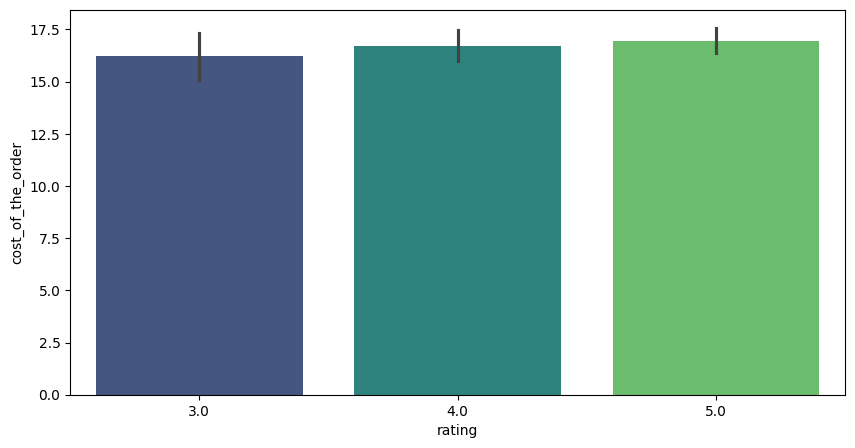

In [ ]:
# visualizing ratings vs cost of order without 'Not given'
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='rating', y ='cost_of_the_order', palette='viridis');

* There does not seem to be a pattern between the cost of the order and whether the rating value is missing.

In [ ]:
# Value counts of 'Not Given'rating and the day of the week order was placed
df.loc[df['rating'].isnull()==True,'day_of_the_week'].value_counts(dropna=False)

Weekend    529
Weekday    207
Name: day_of_the_week, dtype: int64

* There does not seem to be a pattern between the day of the week and whether the rating value is missing.

In [ ]:
# Value counts of 'Not Given'rating and customer ID
df.loc[df['rating'].isnull()==True,'customer_id'].value_counts(dropna=False)

52832     6
83287     5
97079     4
47440     3
186473    3
         ..
58231     1
38116     1
304509    1
41136     1
35309     1
Name: customer_id, Length: 599, dtype: int64

* There does not seem to be a pattern between the unique customer and whether the rating value is missing.

In [ ]:
# Value counts of 'Not Given'rating and order ID
df.loc[df['rating'].isnull()==True,'order_id'].value_counts(dropna=False)

1477147    1
1477995    1
1477803    1
1477503    1
1478126    1
          ..
1476747    1
1477165    1
1477378    1
1476803    1
1478056    1
Name: order_id, Length: 736, dtype: int64

* There does not seem to be a pattern between the order ID and whether the rating value is missing.

In [ ]:
# Value counts of 'Not Given'rating and food preperation time
df.loc[df['rating'].isnull()==True,'food_preparation_time'].value_counts(dropna=False)

31    57
20    51
27    51
25    49
28    49
21    46
24    46
22    45
26    45
23    44
30    44
33    44
34    43
32    42
29    41
35    39
Name: food_preparation_time, dtype: int64

* There does not seem to be a pattern between the food preparation time and whether the rating value is missing.

In [ ]:
# Value counts of 'Not Given'rating and delivery time
df.loc[df['rating'].isnull()==True,'delivery_time'].value_counts(dropna=False)

28    60
29    60
24    60
30    55
26    54
27    52
16    43
25    41
19    39
18    35
22    35
15    33
21    30
23    30
20    29
33    23
17    23
32    21
31    13
Name: delivery_time, dtype: int64

* There does not seem to be a pattern between the delivery time and whether the rating value is missing.

**We can combine the food preperation time and the delivery time. We can combine those two to calculate the total order time.**

In [ ]:
# Adding a new 'total delivery time' column to see if the total time makes a difference
df['total_delivery_time']= df['food_preparation_time']+ df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,49


In [ ]:
# Value counts of 'Not Given'rating and total delivery time
df.loc[df['rating'].isnull()==True,'total_delivery_time'].value_counts(dropna=False)

54    47
56    45
51    45
49    42
55    38
52    37
53    34
45    33
58    33
48    32
50    31
46    31
47    28
61    25
57    23
59    21
64    19
44    19
43    18
60    18
40    17
62    16
42    14
38    12
41    11
63     9
36     9
37     9
39     7
65     6
68     3
66     2
67     1
35     1
Name: total_delivery_time, dtype: int64

* There does not seem to be a pattern between the total delivery time and whether the rating value is missing.

In [ ]:
#Finding the mode rating
df.rating.mode()

0   5.00
Name: rating, dtype: float64

In [ ]:
# Finding the median rating
df.rating.median()

5.0

In [ ]:
#Finding the mean rating
df.rating.mean()

4.344234079173838

In [ ]:
# calculating the percentage of values that were not given
pd.DataFrame({'Count':df.isnull().sum()
[df.isnull().sum()>0], 'Percentage':(df.isnull().sum()
[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
rating,736,38.78


* 38.78 % of the orders were not rated by customers.

In [ ]:
# setting display format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# getting statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00
total_delivery_time,1898.00,51.53,6.83,35.00,47.00,52.00,56.00,68.00


In [ ]:
# filling NaN values
df['rating']=df['rating'].fillna(value='Not Given')

#### Observations:


*   There are 736 orders that do not have any ratings and 1162 orders that do have ratings.
* It seems there might not be an association between the other variables and whether the rating was 'Not Given', so we will not consider them missing values.
* We will have these 'Not Given' values as their rating category in further analyses.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# dropping total_delivery_time to get original summary
df = df.drop('total_delivery_time', axis=1)

# Summary statistics of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

* The means and medians of food prep time and delivery time are close. This suggests a relatively symmetrical distribution in these variables.
* In cost of order, the mean is slightly higher than the median which indicates a right skew, indicating some orders are more expensive than others.
* The standard deviation for cost of order, food prep time, and delivery time is relatively low, but still exists which indicates there is a little bit of variability in these data frames.

*   Food Preparation Time:
  * On average, it takes the restaurant 27 minutes to prepare food for an order once the order is placed. The minimum time taken was 20 minutes, while the maximum time taken was 35 minutes.
  * There is not a huge difference in the mean (27.3 minutes) and the median (27 minutes) of this data, which suggests a relatively symmetric distribution.
  * There is also not a large difference between the minimum value and the 25% percentile, or the maximum value and the 75% percentile of the data  which suggests that outliers might not be present.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# count of not rated orders
value_counts = df['rating'].value_counts(dropna=False)
print(value_counts)

Not Given    736
5.0          588
4.0          386
3.0          188
Name: rating, dtype: int64


#### Observations:



* Customers can rate their orders out of 5 in their app after delivery.
* There are 736 orders not rated in the data set.
* There are 588 orders rated 5.
* There are 386 orders rated 4.
* There are 188 orders rated 3.
* There are no orders rated below a 3.   

* **We will anaylize the implications of these ratings later in our analysis.**


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Order ID

In [ ]:
# checking number of unique order IDs
df['order_id'].nunique()

1898

* We can see that there are 1898 unique orders in this data set.

####Customer ID

In [ ]:
# checking for unique customer IDs
df['customer_id'].nunique()

1200

* We can see that there are 1200 unique customers that placed orders, suggesting that there are customers who ordered from the app more than once.
* This implies that a number of customers were satisfied with their delivery experience.

####Restaurant Name

In [ ]:
# calculating the number of unique restaurants
df['restaurant_name'].unique()
pd.Series(df['restaurant_name'].unique())

0                        Hangawi
1      Blue Ribbon Sushi Izakaya
2                    Cafe Habana
3      Blue Ribbon Fried Chicken
4               Dirty Bird to Go
                 ...            
173                    Rye House
174               Hiroko's Place
175             Frank Restaurant
176              Sarabeth's West
177                   'wichcraft
Length: 178, dtype: object

* We can see that there are 178 unique restaurants included in the data set.

####Cuisine Type

In [ ]:
# check unique cuisine types
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
# check number of unique cuisine types
df['cuisine_type'].nunique()

14

In [ ]:
# check numer of orders for each cuisine type
cuisine_counts=df['cuisine_type'].value_counts()
print(cuisine_counts)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


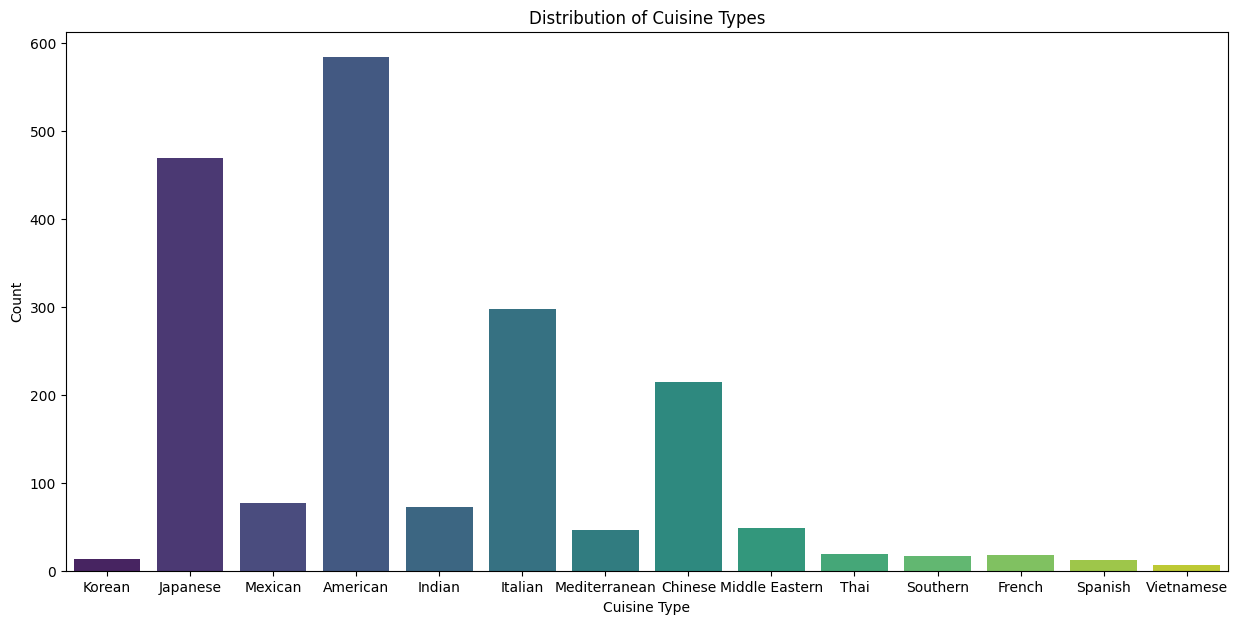

In [ ]:
# checking distribution of unique cuisine types
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type', palette='viridis');
plt.title('Distribution of Cuisine Types')
plt.ylabel('Count')
plt.xlabel('Cuisine Type');

* We can observe that there are 14 different cuisine types present in this data set.
* American is most popular with 584 orders, followed by Japanese with 470 orders.
* Vietmamese is least popular with only 7 orders, followed by Spanish with 12 orders and Korean with 13 orders.


####Day of the Week

In [ ]:
# checking the unique values of weekend vs weekday orders
df['day_of_the_week'].value_counts()


Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# percent of orders on weekend vs weekday
df['day_of_the_week'].value_counts(normalize=True)

Weekend   0.71
Weekday   0.29
Name: day_of_the_week, dtype: float64

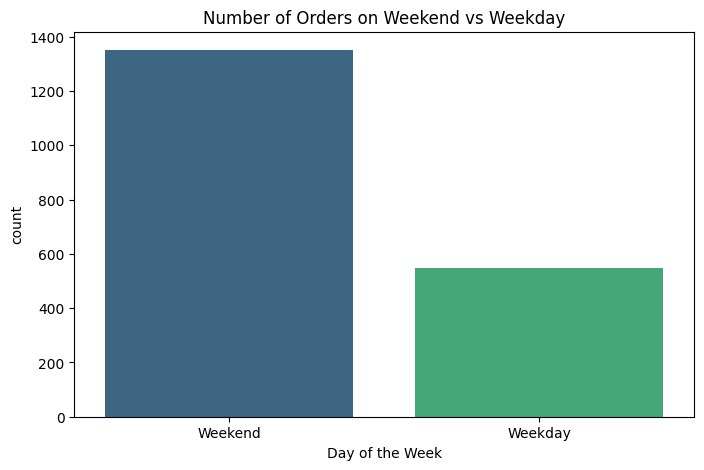

In [ ]:
# bar graph for day of the week
plt.figure(figsize=(8,5))
plt.xlabel('Day of the Week')
sns.countplot(data=df, x='day_of_the_week', palette='viridis');
plt.title('Number of Orders on Weekend vs Weekday');

* The number of weekend orders is much greater than weekday orders.
* We can see that 1351 orders (~71%) were placed on the weekend, which is either Saturday or Sunday.
* We can see that 547 orders (~29%) were placed on a weekday, which includes Monday - Friday.


### Cost of the Order

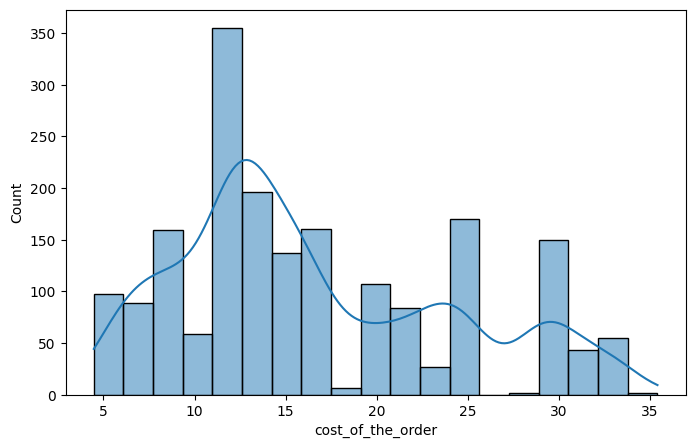

In [ ]:
# histogram for cost of order
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='cost_of_the_order',kde=True,palette='viridis');

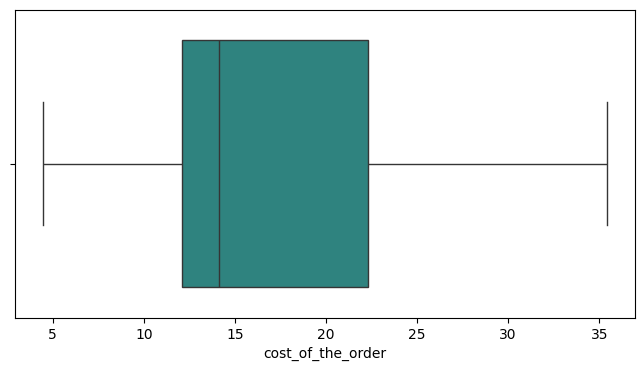

In [ ]:
# boxplot for cost of order
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='cost_of_the_order',palette='viridis');


*   The median cost per order is about 14 dollars, and the data is slightly skewed to the right.
*   Approximately 50% of the data falls between 12 dollars and 22 dollars.  
* The range of the data is 30 dollars, which is a decent amount of variability within the data. We should analyze how other variables impact the cost of the order.






###Rating

In [ ]:
# unique ratings
df['rating'].unique()

array(['Not Given', 5.0, 3.0, 4.0], dtype=object)

* Unique values include 3, 4, 5, and Not Given, which represents the orders where ratings were not given.

In [ ]:
# frequency table for value counts of ratings
frequency_table = df['rating'].value_counts().reset_index()
frequency_table_columns = ['Rating', 'Frequency']
print(frequency_table)

       index  rating
0  Not Given     736
1       5.00     588
2       4.00     386
3       3.00     188


In [ ]:
# percent of orders rated 5, exlcuding 'not given'
numbers_sum = 588+386+188
percent_of_sum_5 = round(588/numbers_sum,2)*100
print(percent_of_sum_5,'%')

#percent of total orders rated 4, excluding 'not given'
percent_of_sum_4 = round(386/numbers_sum,2)*100
print(percent_of_sum_4,'%')

#percent of orders rated 3, excluding 'not given'
percent_of_sum_3 = round(188/numbers_sum,2)*100
print(percent_of_sum_3,'%')


51.0 %
33.0 %
16.0 %


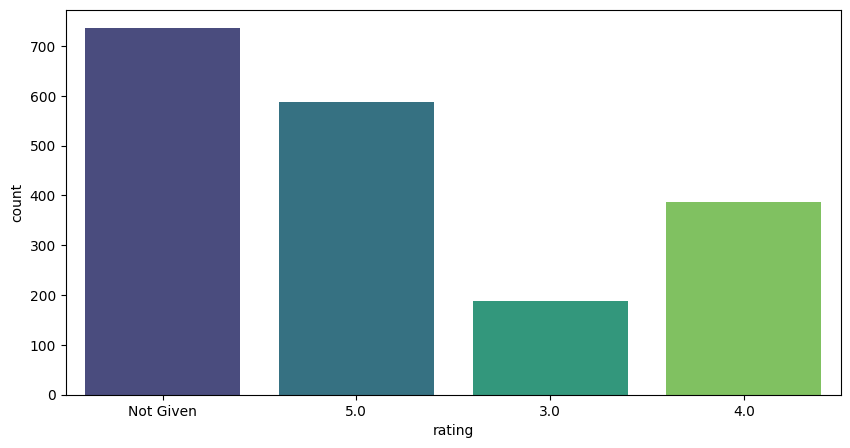

In [ ]:
# countplot for ratings
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', palette='viridis');

* Analysis here have included the 736 ratings that were recorded as 'Not given', which is a significant amount of the orders.
* The ratings are not uniformly distributed, with significantly more orders being rated 5.0 than those rated 4.0 or 3.0, but the highest number of orders were not rated at all.
* 51% of orders that were rated were rated a 5.0, and 33% of orders were rated a 4.0, which indicates a high level of customer satisfaction.
* The absence of ratings below 3.0 and the relatively low percentage for a 3.0 rating (16%) indiate that negative feedback is limited. Examining factors contributing the the 16% of 3.0 ratings could identify specific areas of improvement.

###Food Preparation Time

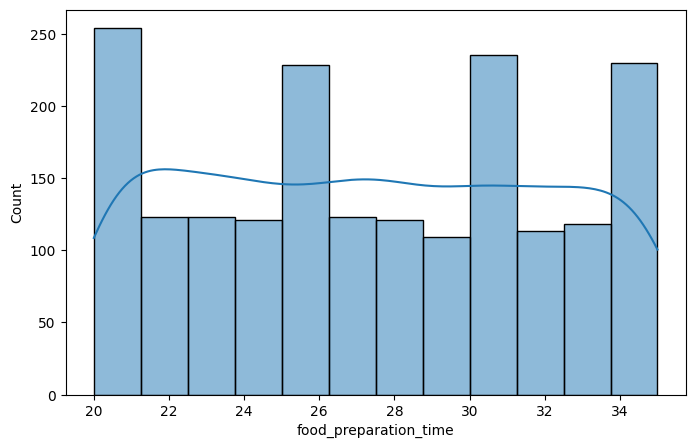

In [ ]:
#histogram for food preparation time
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='food_preparation_time', kde=True, palette='viridis');

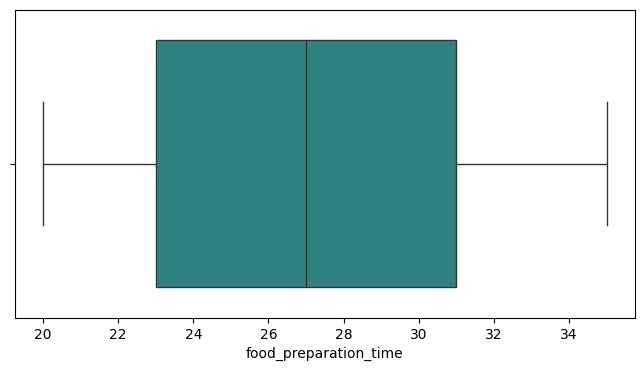

In [ ]:
#boxplot for food preparation time
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='food_preparation_time',palette='viridis');


*   The median time taken to prepare the food is 27 minutes, and the average is very close with 27.3 minutes. Although the mean and median are close, they are not exactly equal, which suggests a slightly postive skew given that the mean is greater than the median.  
*   About 50% of the orders take about 23 to 31 minutes to prepare.
* There are peaks in the data at 21, 25, 30, and 34 minutes, where over 200 orders took those amounts of time to be prepared.
* The range of the data is 15 minutes and there are no outliers - this is a pretty small time frame, which suggests there is limited variability in the preperation times across the data set.
* This predictability can be beneficial for planning and operational purposes. It also may be signs of efficiency in the restaurants, ensuring that dishes are prepared within a specified time frame.

###Delivery Time

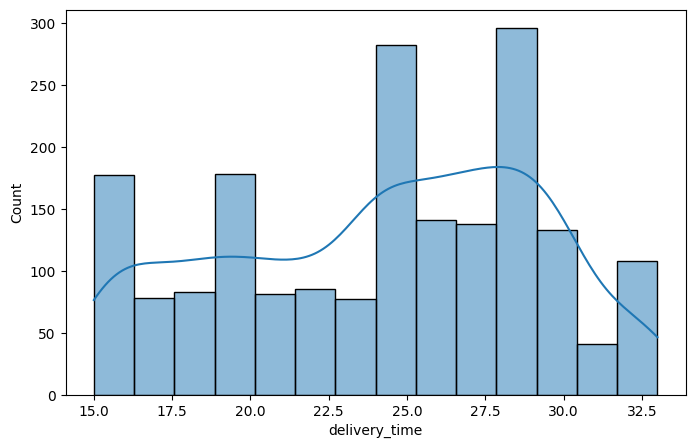

In [ ]:
# histogram of delivery time
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='delivery_time',palette='viridis',kde=True);

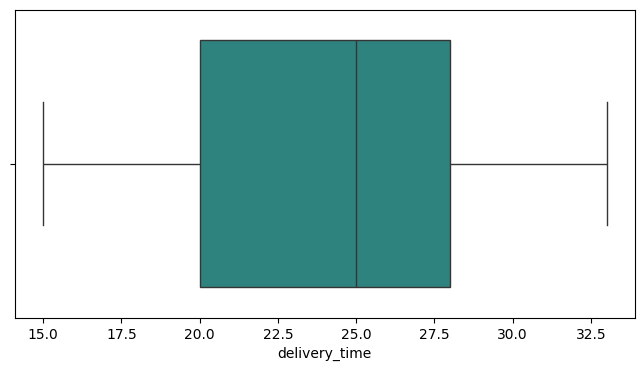

In [ ]:
# boxplot of delivery time
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='delivery_time',palette='viridis');

* We can observe that the median delivery time is 25 minutes, and 50% of delivery times fall between 20-28 minutes.
* The shortest delivery time is 15 minutes and the longest is 33 minutes.
* There are peaks in the data suggesting there are a high number of deliveries that frequently take around 24 minutes and 28 minutes.
* Data is left skewed and no outliers are present.
* The range is 18 minutes, which similar to food prep time, is fairly small. This indicates that the delivery service is consistent and realiable, so customers can expect their orders within a relatively uniform timeframe.
* There may be a reason for longer/shorter delivery time that is not included in our data set and might be something to look into in future analyses, such as distance from the restaurant to drop off, form of driver transportation, time of day, traffic, etc.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

###Most Popular/Least Popular Restaurants in Orders Receieved

In [ ]:
# value counts for top 5 restaurants
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
# percentage of orders from top 5 restaurants
df['restaurant_name'].value_counts(normalize=True).head(5)

Shake Shack                 0.12
The Meatball Shop           0.07
Blue Ribbon Sushi           0.06
Blue Ribbon Fried Chicken   0.05
Parm                        0.04
Name: restaurant_name, dtype: float64

#### Observations:


* The highest number of orders came from Shake Shack at 219 orders, and 11.5% of total orders coming from there.
* Top 5 restaurants in order are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# most popular cuisines on the weekend
df_weekend = df[df['day_of_the_week']=='Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

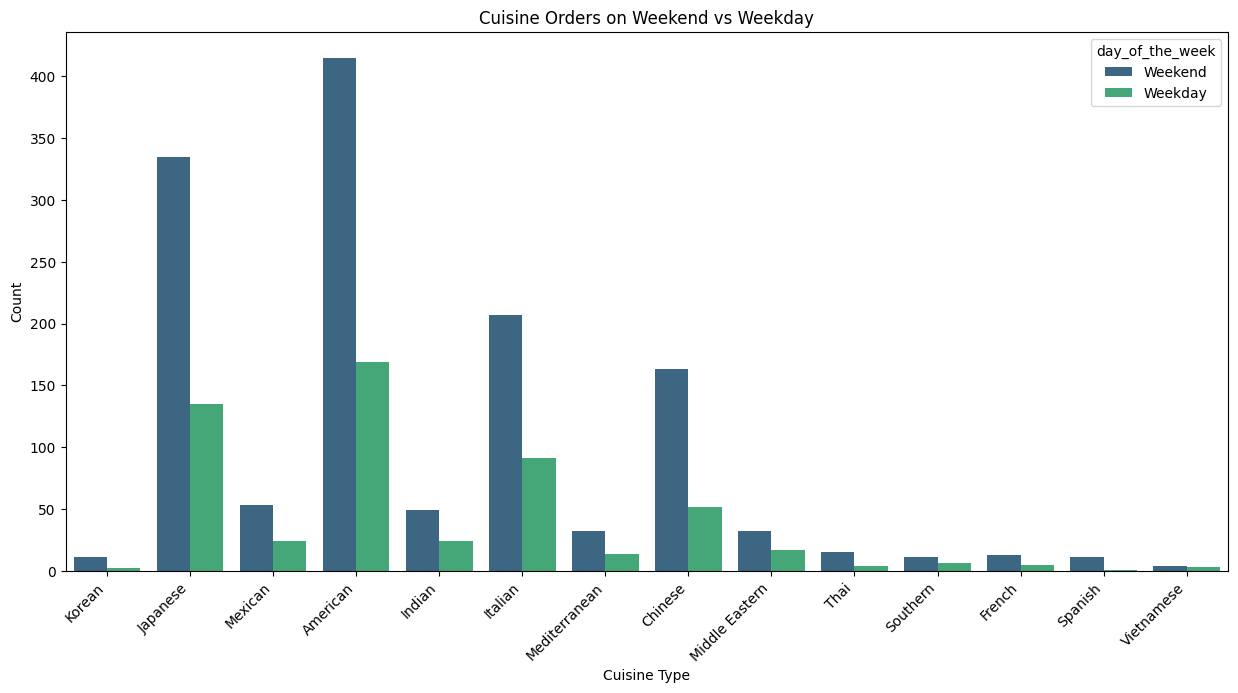

In [ ]:
# bar chart for cuisine orders on the weekend vs weekday
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week',palette='viridis');
plt.xticks(rotation=45, ha='right');
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Cuisine Orders on Weekend vs Weekday');


#### Observations:



*  American cuisine is most popular on the weekend, followed by Japanese cuisine.
* American cuisine had 410 orders on the weekend and Japanese had 334 orders on the weekend.
* The least popular cuisine on the weekend was Vietnamese, with only 4 orders.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# number of orders over 20 dollars
orders_over_20 = df[df['cost_of_the_order']>20]
print('There are a total of', orders_over_20.shape[0],'orders that cost more than 20 dollars')

# percentage of orders over 20 dollars
percentage_of_orders_over_20 = (orders_over_20.shape[0]/df.shape[0])*100
print('The percentage of orders over 20 dollars is',round(percentage_of_orders_over_20, 2),'%' )

There are a total of 555 orders that cost more than 20 dollars
The percentage of orders over 20 dollars is 29.24 %


####Observations:

* 29.24% of orders cost over 20 dollars, so around 75.76% of orders cost less than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculating average order delivery time
mean_order_delivery = df['delivery_time'].mean()
print('The mean order delivery time is', round(mean_order_delivery, 1),'minutes.')

The mean order delivery time is 24.2 minutes.


####Observations:

*   Delivery time is about 24 minutes on average.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# getting the number of unique order IDs
df['customer_id'].nunique()

1200

In [ ]:
# getting the counts of top 3 customers
top3_table = df['customer_id'].value_counts().head(3)
print(top3_table)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:



*   Out of the 1898 orders, there are 1200 unique customer IDs. This means there are customers who have ordered more than once.
*   Customer ID 52832 has ordered from the app the most, with 13 orders total.
* Customer ID 47440 has ordered the second most with 10 orders, followed by Customer ID 83287 with 9 orders.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Day of the Week vs Rating



In [ ]:
# grouping rating category counts by day of week
ratings_by_day = df.groupby('day_of_the_week')['rating'].value_counts()
print(ratings_by_day)

print('-' * 40)

# showing percentage of each
percent_ratings_by_day = df.groupby('day_of_the_week')['rating'].value_counts(normalize=True)
print(percent_ratings_by_day)


day_of_the_week  rating   
Weekday          Not Given    207
                 5.0          168
                 4.0          109
                 3.0           63
Weekend          Not Given    529
                 5.0          420
                 4.0          277
                 3.0          125
Name: rating, dtype: int64
----------------------------------------
day_of_the_week  rating   
Weekday          Not Given   0.38
                 5.0         0.31
                 4.0         0.20
                 3.0         0.12
Weekend          Not Given   0.39
                 5.0         0.31
                 4.0         0.21
                 3.0         0.09
Name: rating, dtype: float64


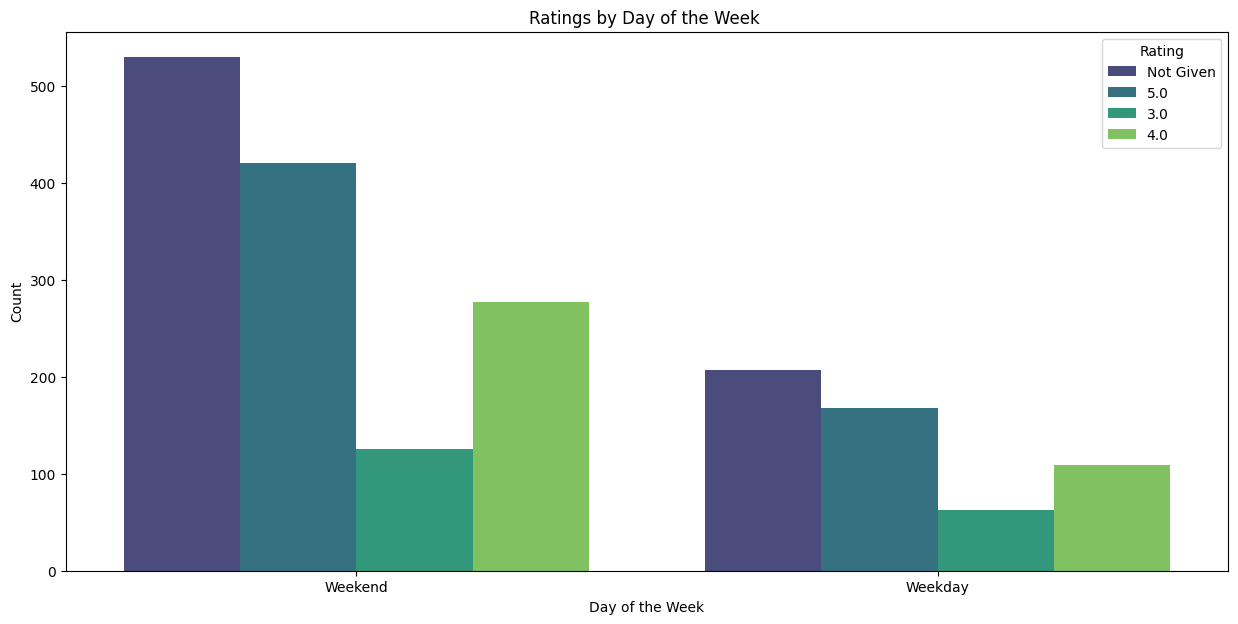

In [ ]:
# count plot with 'day_of_the_week' and rating counts, using the rating categories as hue
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='day_of_the_week', hue='rating', palette='viridis', dodge=True)
plt.title('Ratings by Day of the Week ')
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.legend(title='Rating')

# Show the plot
plt.show()

* We can see here that the graph for rating counts on weekdays and weekends looks very similar. We can conclude that the day of the week does not have an impact on rating.

#### Day of the Week vs Restaurant Name

In [ ]:
# Grouping restaurant name/ order counts by day of week and restaurant name

#count of weekday restaurant orders
print('Order Count on Weekday\n')
restaurants_by_weekday = df[df['day_of_the_week'] == 'Weekday']['restaurant_name'].value_counts(ascending=False)
print(restaurants_by_weekday.head(8),'\n')

#count of weekend restaurant orderes
print('Order Count on Weekend\n')
restaurants_by_weekend = df[df['day_of_the_week'] == 'Weekend']['restaurant_name'].value_counts(ascending=False)
print(restaurants_by_weekend.head(8))

print('-' * 50)

# percentage of weekday restaurant orders
print('Percentage on Weekday\n')
percent_restaurants_by_weekday = df[df['day_of_the_week'] == 'Weekday']['restaurant_name'].value_counts(normalize=True, ascending=False)
print(percent_restaurants_by_weekday.head(8),'\n')

#percentage of weekend restaurant orderes
print('Percentage on Weekend\n')
percent_restaurants_by_weekend = df[df['day_of_the_week'] == 'Weekend']['restaurant_name'].value_counts(normalize=True, ascending=False)
print(percent_restaurants_by_weekend.head(8))
print('-' * 40)

Order Count on Weekday

Shake Shack                      74
The Meatball Shop                37
Blue Ribbon Sushi                34
Parm                             26
Blue Ribbon Fried Chicken        22
Blue Ribbon Sushi Bar & Grill    15
RedFarm Broadway                 15
Sushi of Gari 46                 13
Name: restaurant_name, dtype: int64 

Order Count on Weekend

Shake Shack                  145
The Meatball Shop             95
Blue Ribbon Sushi             85
Blue Ribbon Fried Chicken     74
RedFarm Broadway              44
RedFarm Hudson                44
Parm                          42
TAO                           37
Name: restaurant_name, dtype: int64
--------------------------------------------------
Percentage on Weekday

Shake Shack                     0.14
The Meatball Shop               0.07
Blue Ribbon Sushi               0.06
Parm                            0.05
Blue Ribbon Fried Chicken       0.04
Blue Ribbon Sushi Bar & Grill   0.03
RedFarm Broadway              

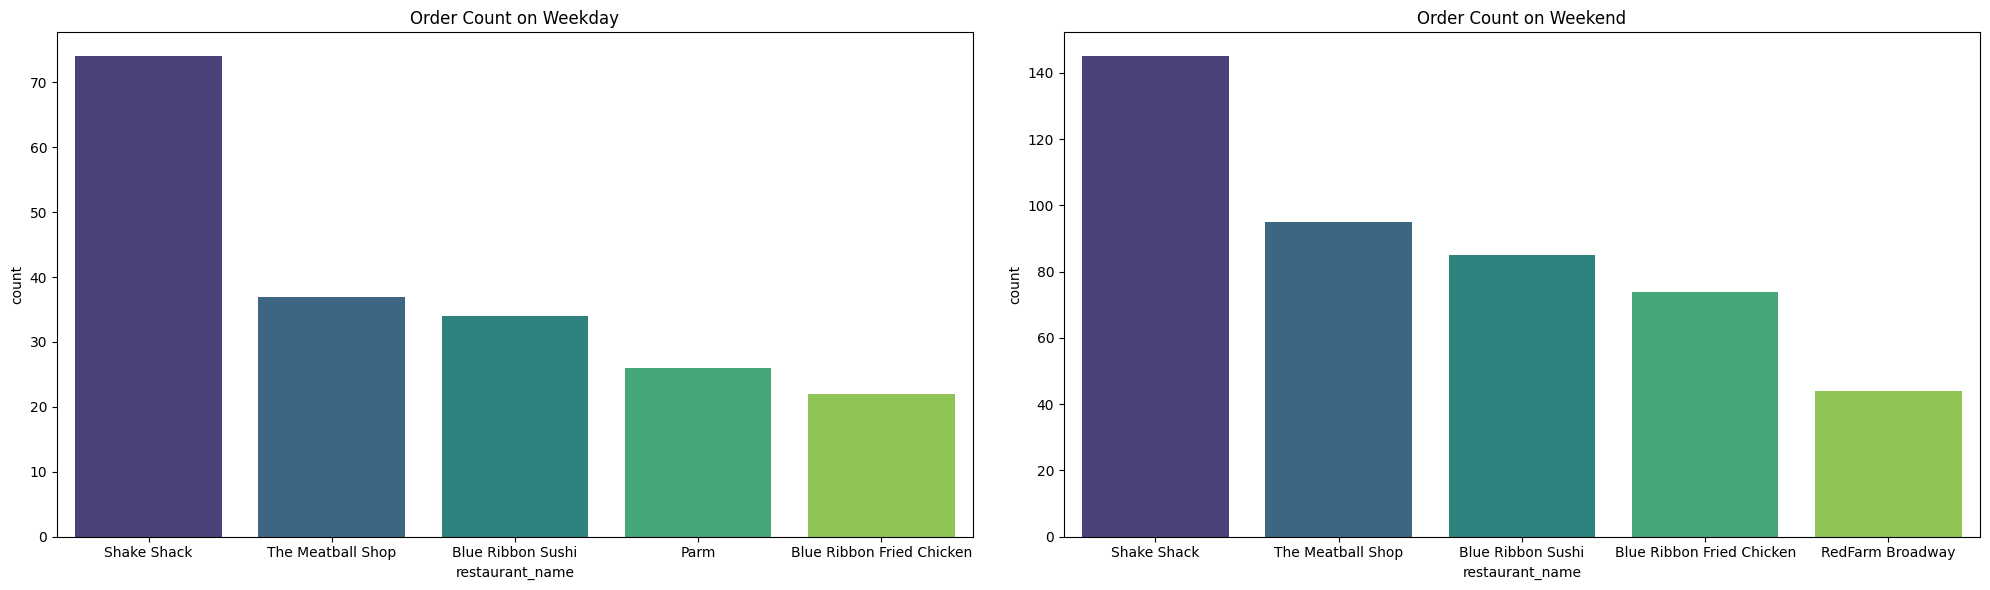

In [ ]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# create a countplot for weekday orders
sns.countplot(data=df[df['day_of_the_week'] == 'Weekday'], x='restaurant_name', order=restaurants_by_weekday.index[:5], ax=axes[0],palette='viridis')
axes[0].set_title('Order Count on Weekday')


# create a countplot for weekend orders
sns.countplot(data=df[df['day_of_the_week'] == 'Weekend'], x='restaurant_name', order=restaurants_by_weekend.index[:5], ax=axes[1],palette='viridis')
axes[1].set_title('Order Count on Weekend')

# adjust layout
plt.tight_layout()
plt.show()

* It appears that Shake Shack, The Meatball Shop, and Blue Ribbon Sushi have the highest order count on both weekdays and weekends.
* Order counts for most restaurants are higher on weekends than weekdays, which is expected as weekends generally see more food orders.
* Some restaurants, like Shake Shack, have a slightly lower percentage on weekends, suggesting that while the order count is higher, it might not contribute as much to the total weekend orders relative to other restaurants.
* TAO has a relatively higher percentage on weekends compared to weekdays, suggesting that it might be more popular or receives a higher proportion of orders on weekends.
* RedFarm Broadway and RedFarm Hudson have the same order counts on weekends - this could be that they are two different locations of the same restaurant, indicating consistent popularity.

#### Cuisine vs Restaurant Name

In [ ]:
#value counts for restaurants of certain cuisines
cuisine_count = df.groupby('cuisine_type')['restaurant_name'].nunique()
cuisine_count=cuisine_count.sort_values(ascending=False)
print(cuisine_count)

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64


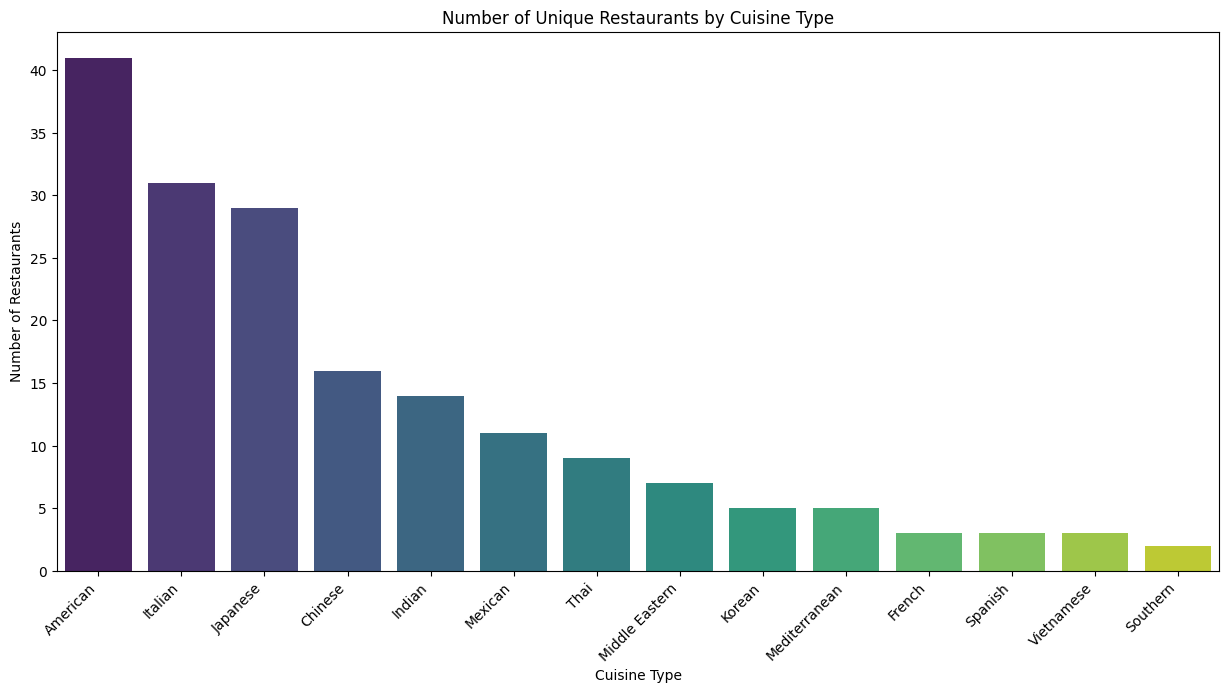

In [ ]:
# cuisine type by restaurant count
plt.figure(figsize=(15, 7))
sns.barplot(x=cuisine_count.index, y=cuisine_count.values, palette='viridis')
plt.title('Number of Unique Restaurants by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

* American restuarants have the highest number of restaurants on the app.
* Southern restaurants have the least number of restaurants on the app.

####Cuisine vs Cost of the Order

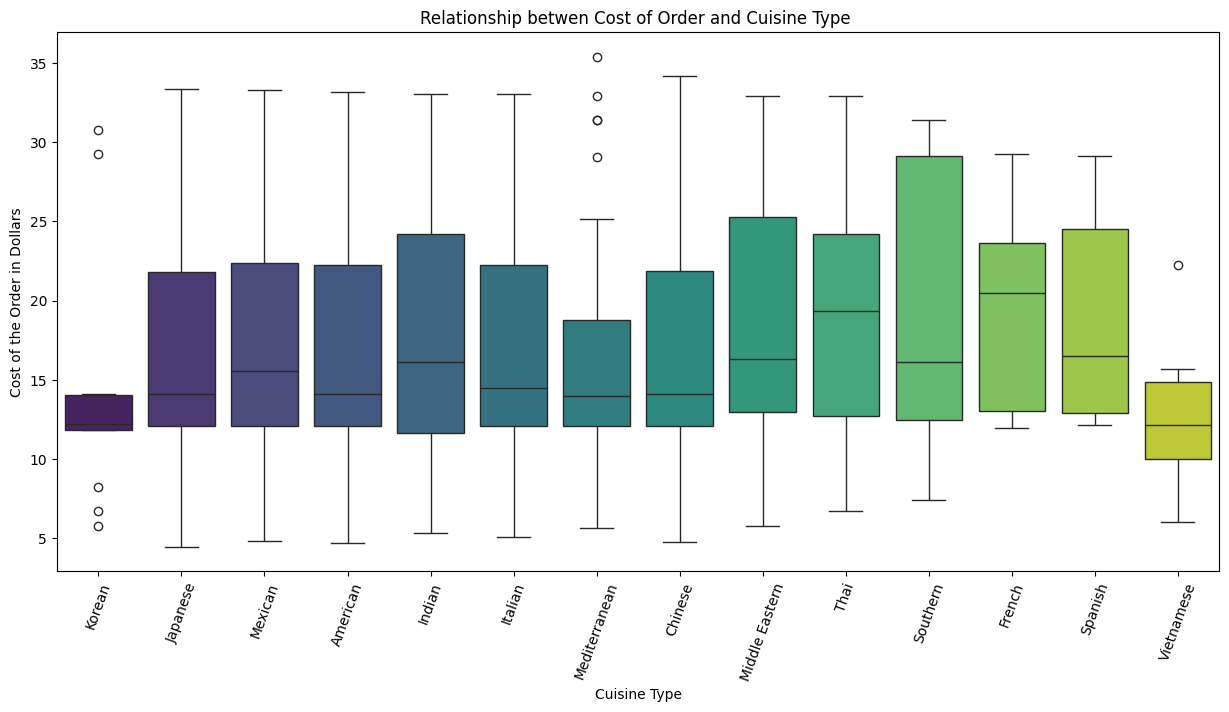

In [ ]:
# relationship between cost of order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df,palette='viridis')
plt.xticks(rotation=70)
plt.title('Relationship betwen Cost of Order and Cuisine Type ')
plt.ylabel('Cost of the Order in Dollars')
plt.xlabel('Cuisine Type')
plt.show()


* Mediterranean cuisine has the highest cost of an order (outlier, but still true).
* Thai food has the highest median cost of order, and Vietnamese has the lowest.
* Southern cuisine has a large spread in the middle 50% of the data, suggesting that they may have menu items that are very inexpensive, and some that are expensive. It also could be considered that Southern food is often served family style, so customers may be ordering for more than one person.
* The data for Korean and Vietnamese cuisine types have a smaller spread relative to most other cuisine types, and both contain outliers. It should be noted that these two sets have a relatively small number of observations, so central tendency is more sensitive to individual data points. These smaller data sets are more prone to variability and outliers appear to have a significant impact on the calculated statistics in this case.

<Figure size 1500x700 with 0 Axes>

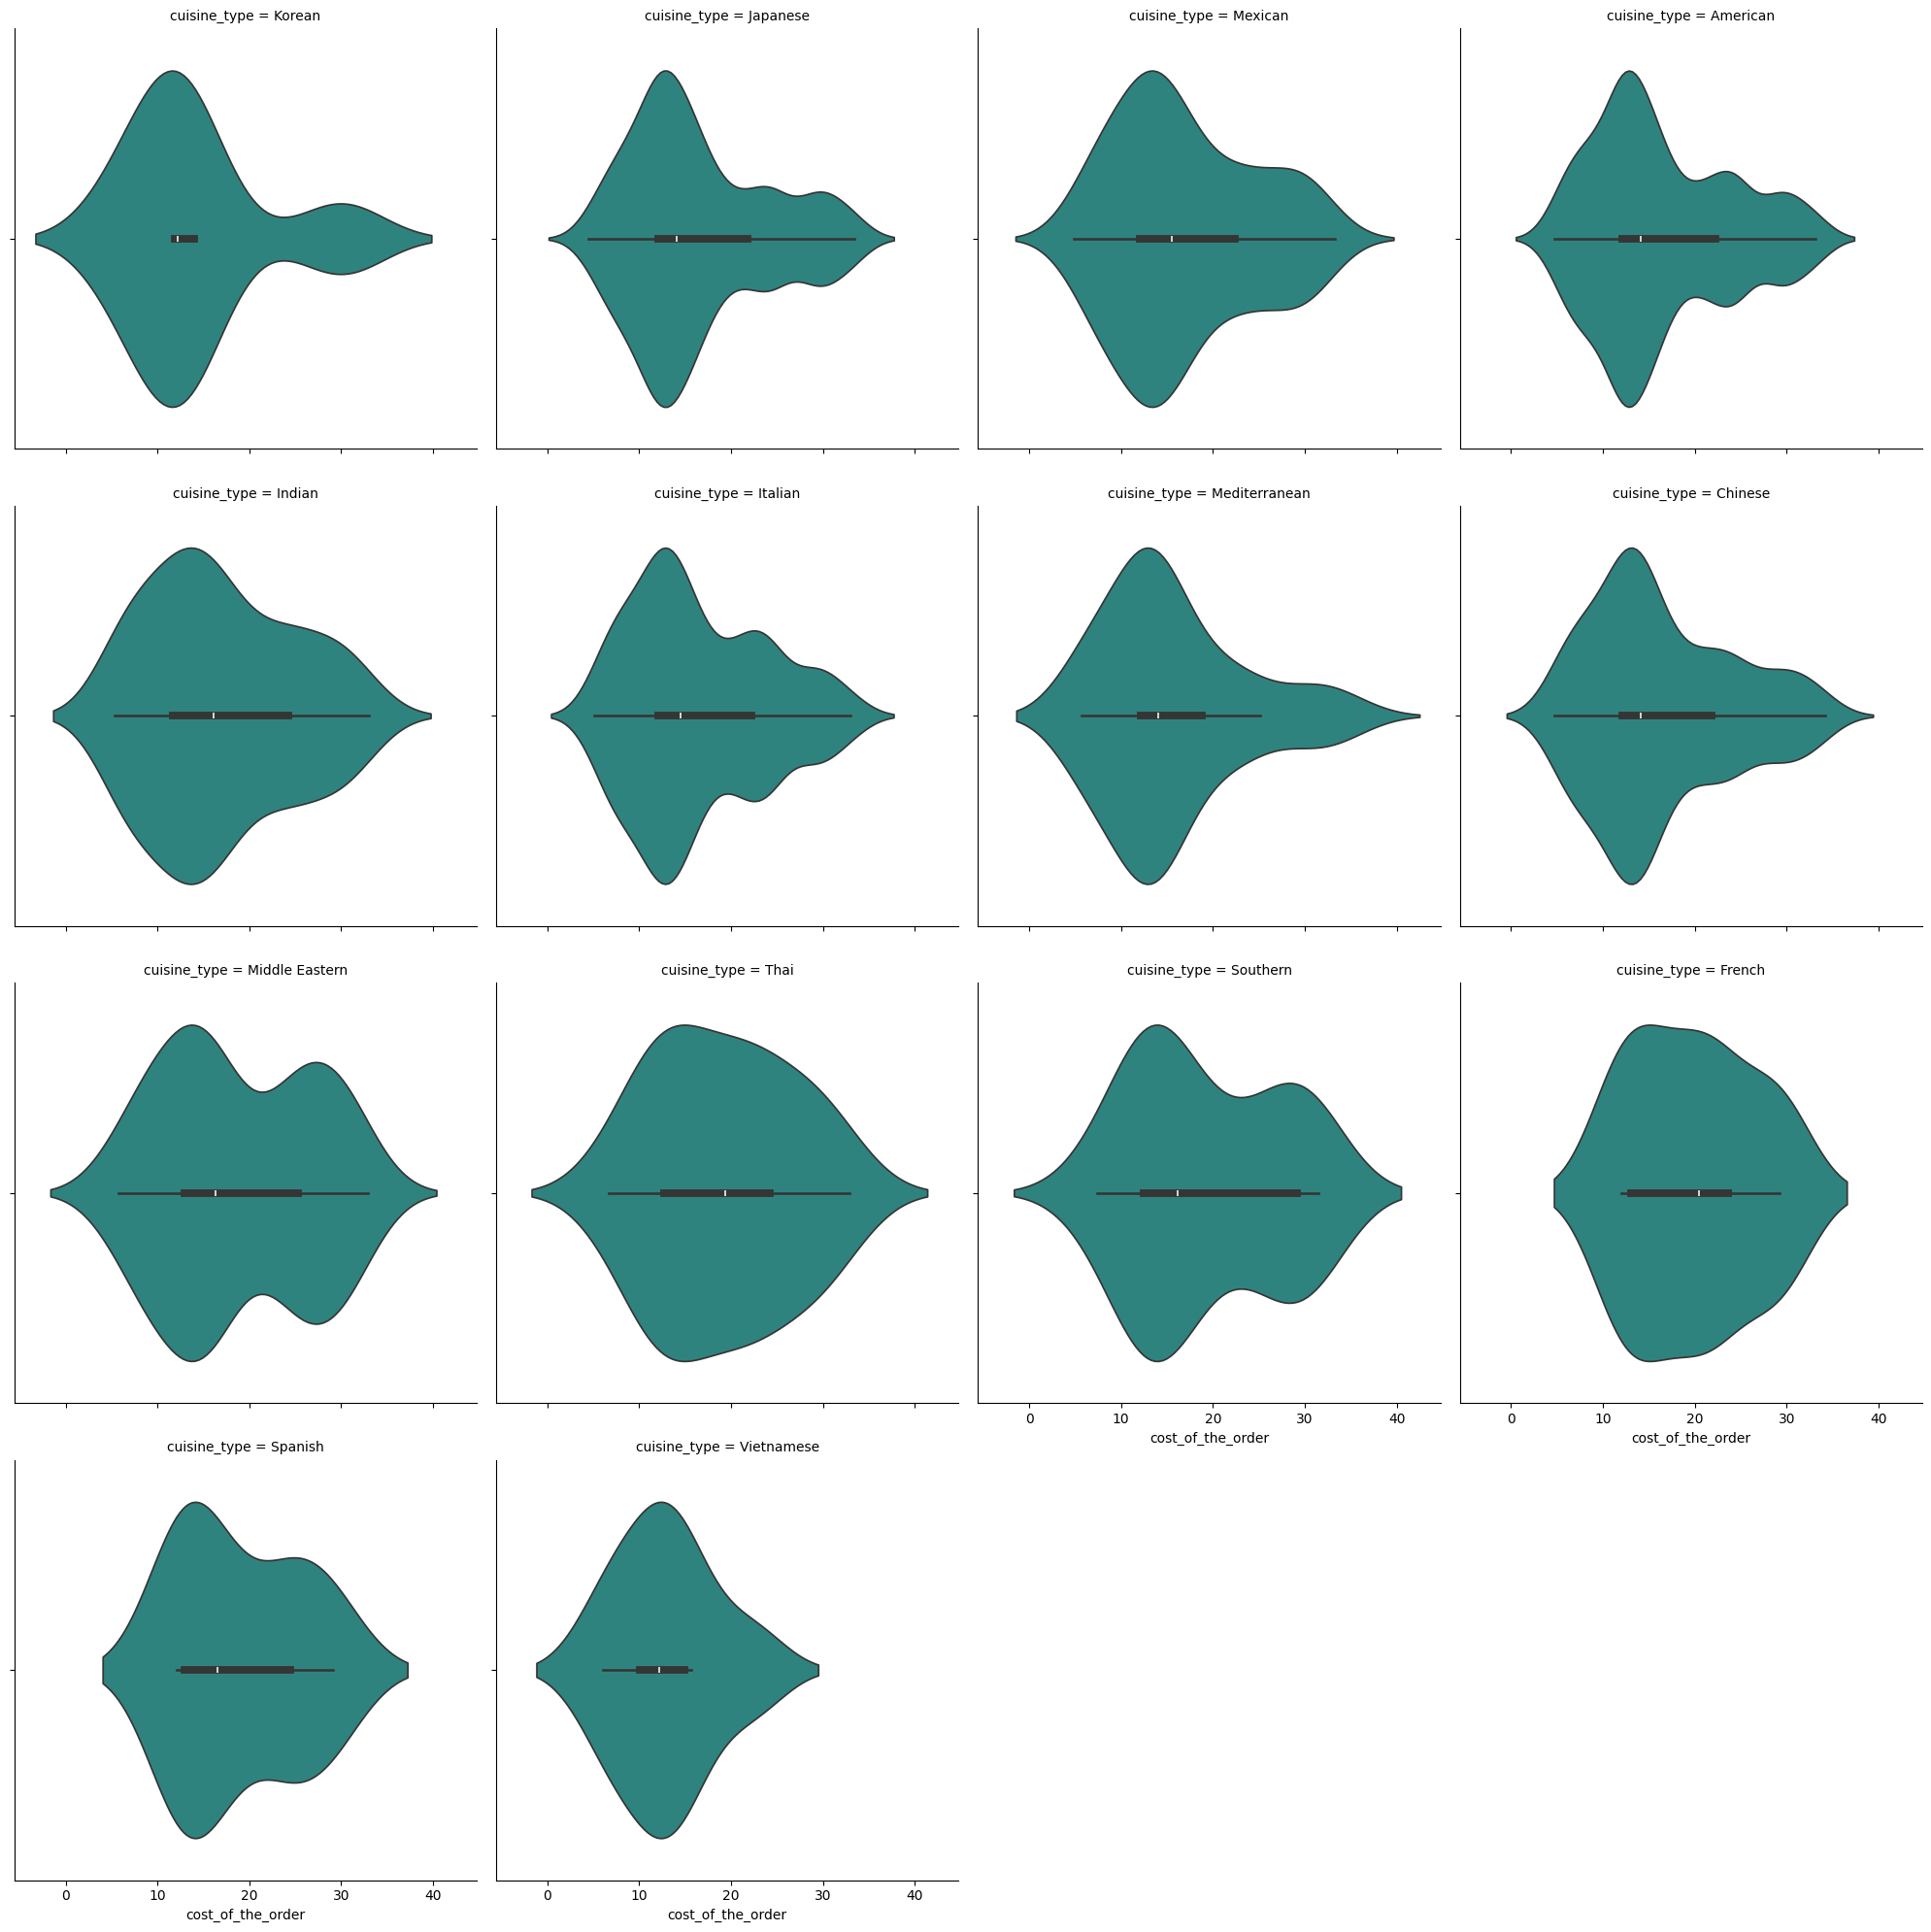

In [ ]:
# dispersion of food prep time in every cuisine
plt.figure(figsize=(15,7));
sns.catplot(x='cost_of_the_order',col='cuisine_type',data=df,col_wrap=4,kind='violin',palette='viridis');


* The circular shape of the violin plots for Vietnamese and French cuisine suggest there is no strong skewness to one side.
* Upon visual inspection, the box plots and violin plots for the two most popular cuisines, American and Japanese, appear remarkably similar. Further analyis could unveil patterns that may not be immediately apparent from the box plots alone.
* We might consider gathering additional data such as location (of restaurant AND customer), number of restaurants of that cuisine in the area, how many people are included in the order, etc., to anaylize the relationships between these variables further.

In [ ]:
# check if there is a trend across day of the week
df.groupby(by=['cuisine_type','day_of_the_week'])['cost_of_the_order'].mean()

cuisine_type    day_of_the_week
American        Weekday           15.31
                Weekend           16.73
Chinese         Weekday           17.15
                Weekend           16.04
French          Weekday           20.87
                Weekend           19.38
Indian          Weekday           17.16
                Weekend           16.80
Italian         Weekday           16.89
                Weekend           16.21
Japanese        Weekday           16.37
                Weekend           16.28
Korean          Weekday           12.18
                Weekend           14.33
Mediterranean   Weekday           14.04
                Weekend           16.10
Mexican         Weekday           16.56
                Weekend           17.10
Middle Eastern  Weekday           19.83
                Weekend           18.28
Southern        Weekday           19.23
                Weekend           19.34
Spanish         Weekday           12.13
                Weekend           19.62
Thai    

* Whether it is a weekend or a weekday does not appear to have a large effect on the average price of orders except in those with a small sample size, which can likely be attributed to randomness.

####Cuisine vs Food Preparation Time

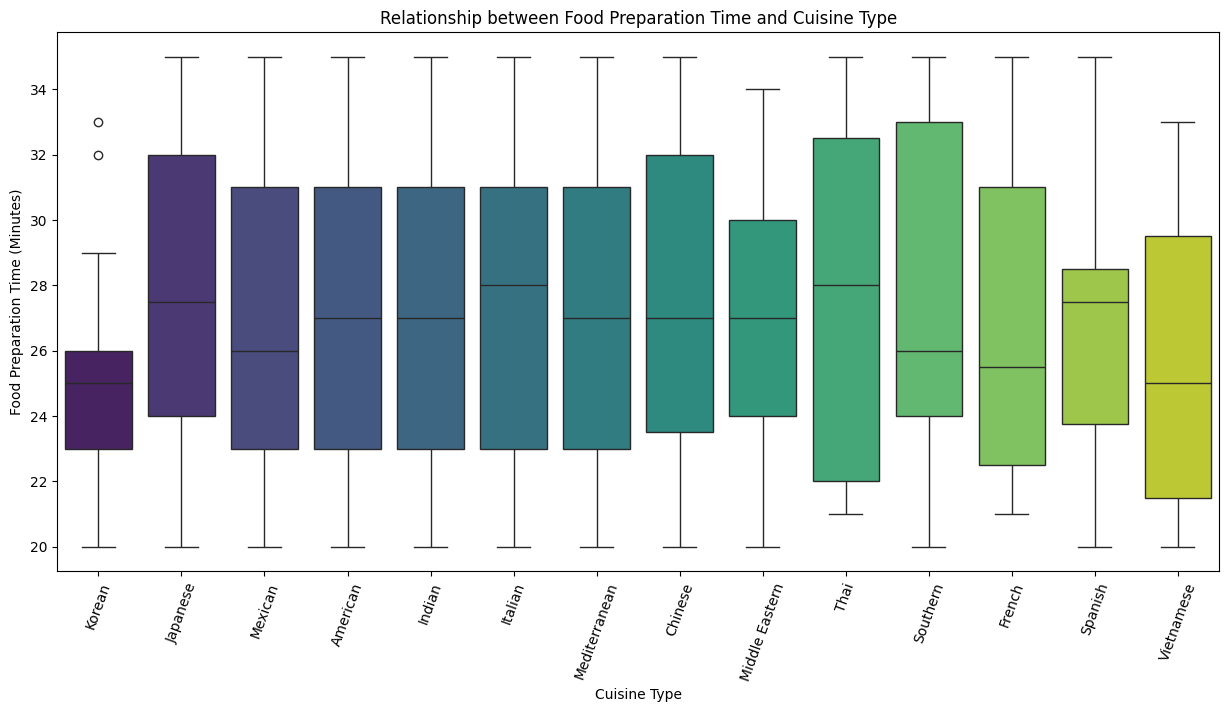

In [ ]:
# relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df,palette='viridis')
plt.xticks(rotation=70)
plt.title('Relationship between Food Preparation Time and Cuisine Type')
plt.ylabel('Food Preparation Time (Minutes)')
plt.xlabel('Cuisine Type')
plt.show()

<Figure size 1500x700 with 0 Axes>

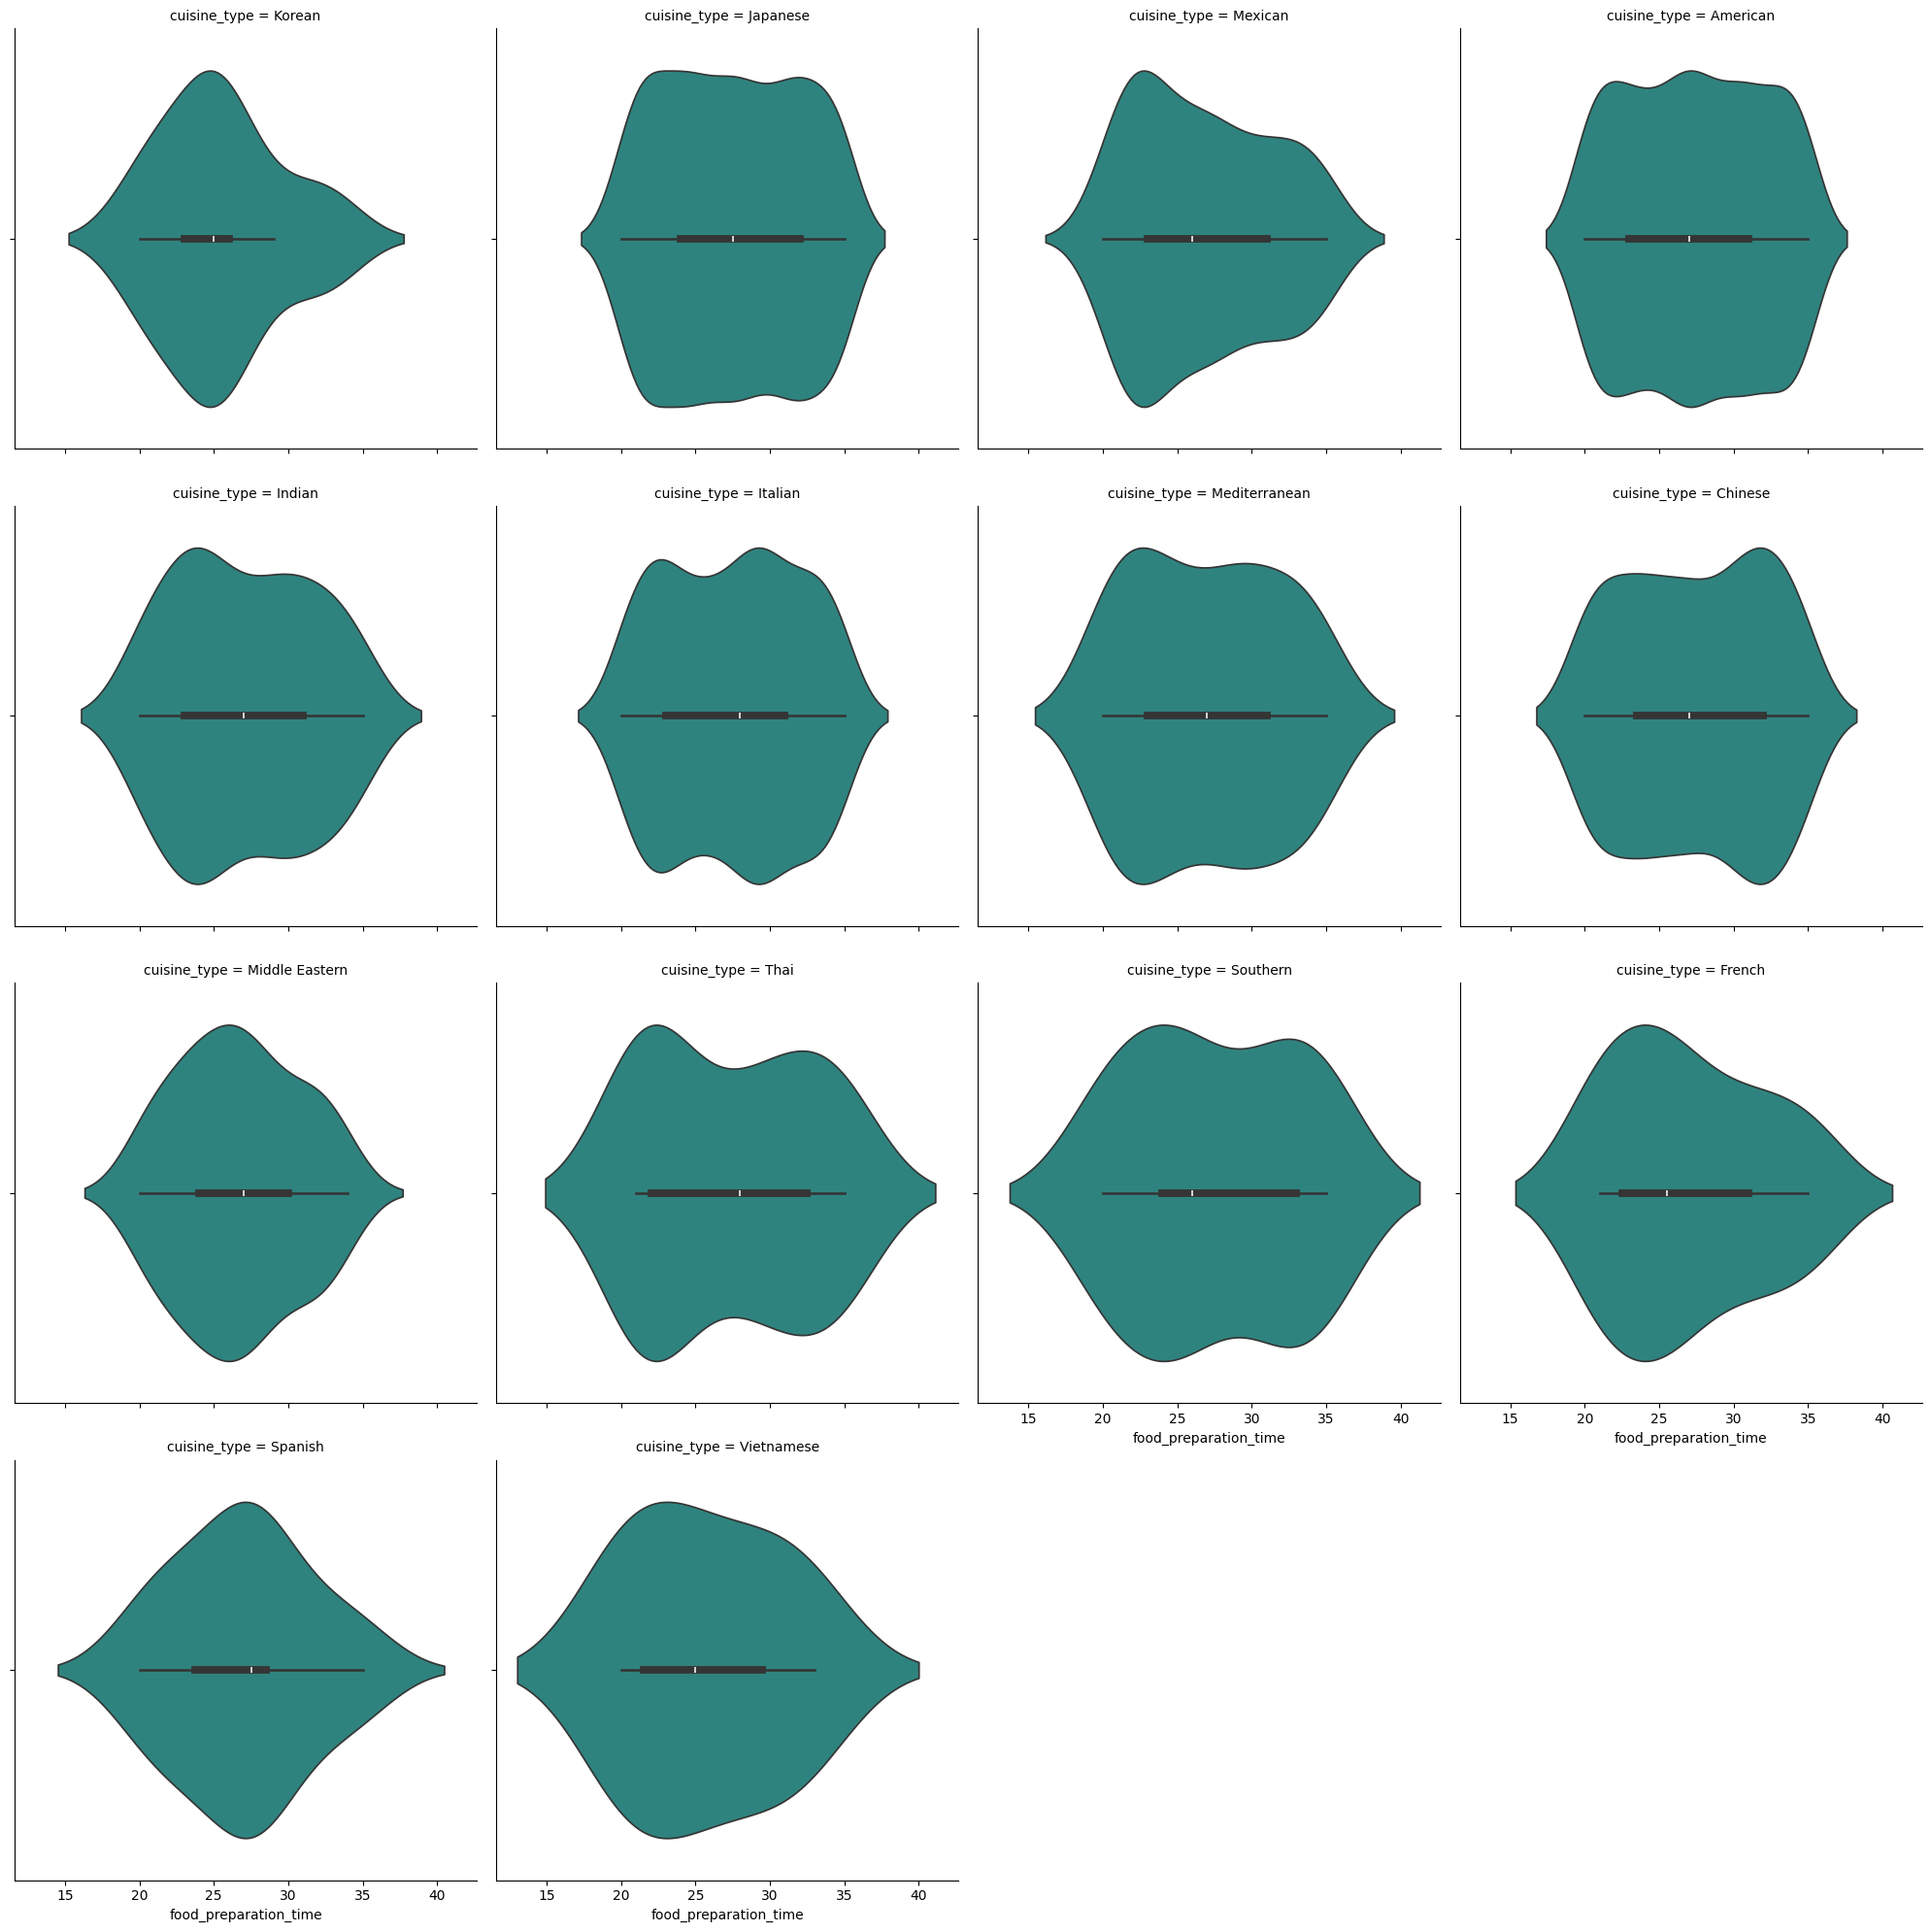

In [ ]:
# dispersion of food prep time in every cuisine
plt.figure(figsize=(15,7))
sns.catplot(x='food_preparation_time',col='cuisine_type',data=df,col_wrap=4,kind='violin',palette='viridis');

* Korean, Vietnamese, and French cuisine appear to have a lower median food prep time than the other cuisines.
* Italian and Thai food appear to have the highest median prep time.
* Many of the cuisines have medians that fall between 26-28 minutes for food prep time.
* American, Indian, and Mediterranian cuisine have identical boxplots. We should consider looking into this further and consider looking into what factors into the consistency between these variables of interest.
* We should consider whether external factors affect the food prep time, such as the cooking process, the chef, whether the driver is already at the restaurant, what dish is being prepared, etc.

####Day of the Week vs Delivery Time

In [ ]:
# statistical summary of delivery time across days of the week
df_week_delivery = df.groupby(by=['day_of_the_week'])['delivery_time']
df_week_delivery.describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.00,28.34,2.89,24.00,26.00,28.00,31.00,33.00
Weekend,1351.00,22.47,4.63,15.00,18.50,22.00,27.00,30.00


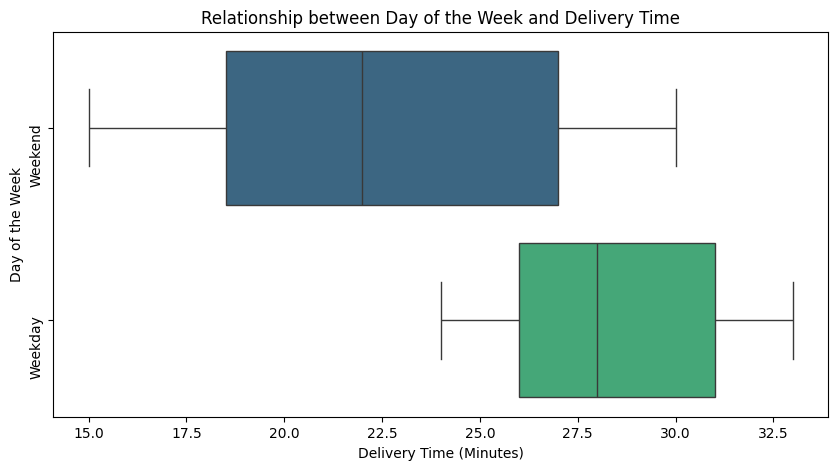

In [ ]:
# relationship between day of the week and delivery time
plt.figure(figsize=(10,5))
sns.boxplot(x='delivery_time',y='day_of_the_week', data=df, palette='viridis')
plt.yticks(rotation=90)
plt.title('Relationship between Day of the Week and Delivery Time')
plt.ylabel('Day of the Week')
plt.xlabel('Delivery Time (Minutes)')
plt.show()

* The delivery time is longer on the weekdays.
* Median delivery time on the weekend is around 21 minutes, while median delivery time on the weekdays is around 28 minutes.
* The minimum time on the weekend was 15 minutes, while the minumum time on the weekday was 24 minutes, which is higher than the weekend median.
* Many people are commuting to/from work during weekdays, so factors such as traffic conditions or time the order was placed could be useful to look into here.

####Rating vs Delivery Time

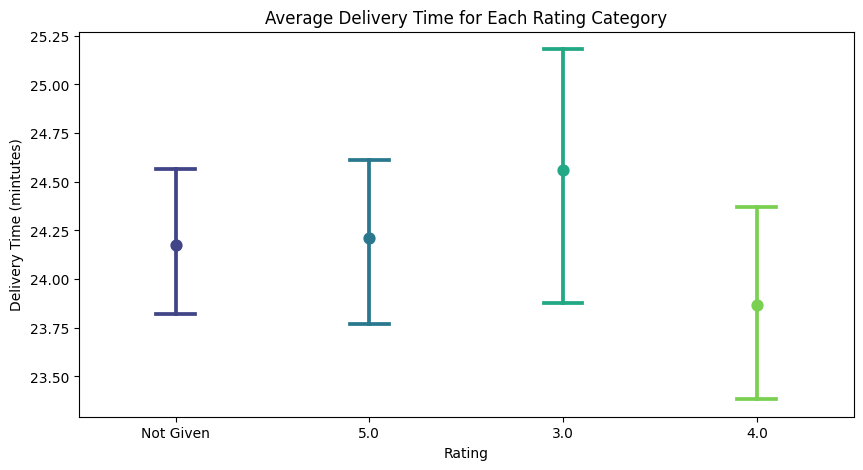

In [ ]:
# relationship between rating and food preparation time
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='rating', y='delivery_time',capsize=0.2,palette='viridis');
plt.title('Average Delivery Time for Each Rating Category')
plt.ylabel('Delivery Time (mintutes)')
plt.xlabel('Rating');

* There is a very minimal difference in the average delivery time by rating, but delivery time is slightly increased by half a minute for 3.0 ratings and decrased by half a minute for 4.0 ratings. These differences are so minimal it does not seem to imply that there is a lot of variation between these rating categories.
* The error bar for the 3.0 and 4.0 rating indicates that delivery time of orders within those rating category tend to vary slightly more compared to other rating categories.

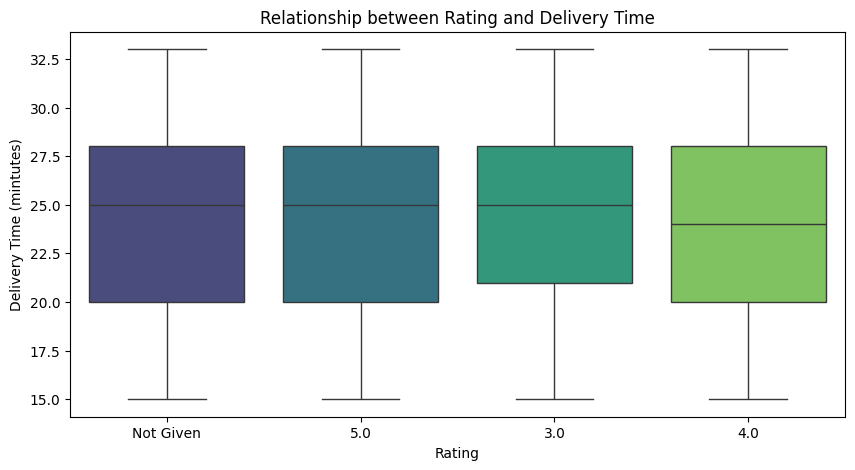

In [ ]:
# relationship between rating and delivery time
plt.figure(figsize=(10,5))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df, palette='viridis')
plt.title('Relationship between Rating and Delivery Time')
plt.ylabel('Delivery Time (mintutes)')
plt.xlabel('Rating');

* The median delivery time for 'Not Given', 5.0, and 3.0 all appear to be the same at around 25 minutes.
* There are no outliers within the data set.
* The rating 3.0 has the smallest smallest range of delivery times in the middle 50% of the data.
* Given the graphs show minimal variability within each rating category, it does not appear that delivery time has a significant impact on the rating of the order.

####Rating vs Food Preparation Time

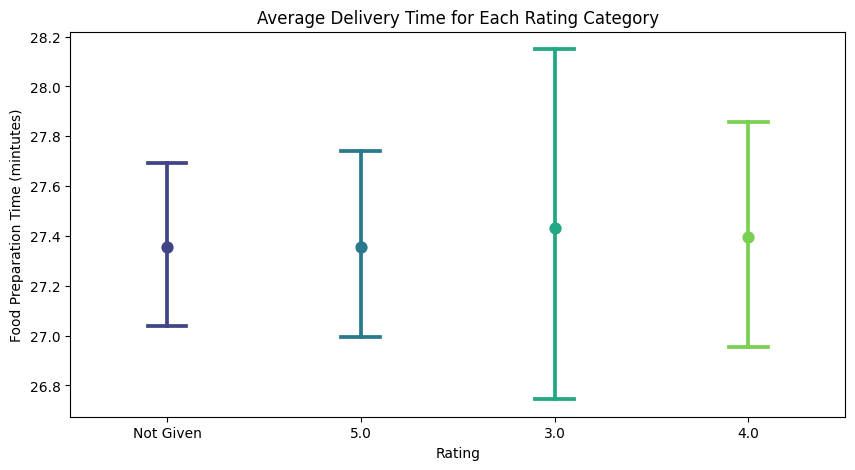

In [ ]:
# relationship between rating and food preparation time
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='rating', y='food_preparation_time',capsize=0.2,palette='viridis');
plt.title('Average Delivery Time for Each Rating Category')
plt.ylabel('Food Preparation Time (mintutes)')
plt.xlabel('Rating');

* There average food prep time seems to be almost the same across all ratings, implying little variability.
* The error bar for the 3.0 rating indicates that food preparation time of orders within that rating category tend to vary more or have less consistency compared to other rating categories.

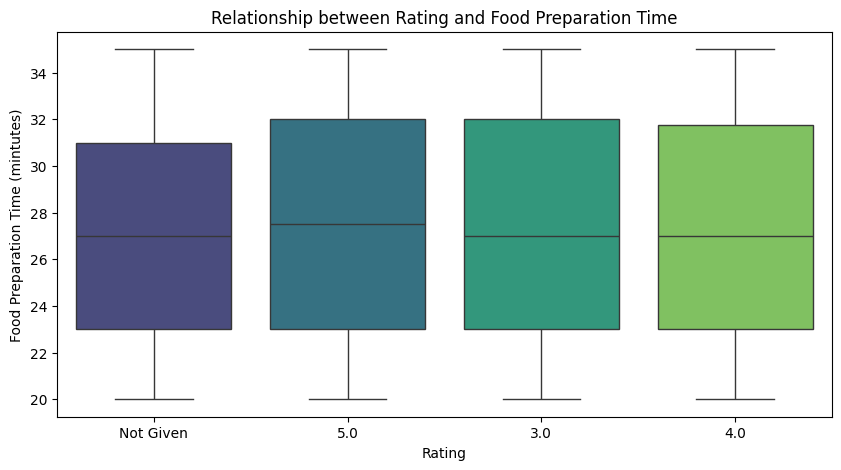

In [ ]:
# box plot relationship between rating and food preparation time
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='rating', y='food_preparation_time', palette='viridis');
plt.title('Relationship between Rating and Food Preparation Time')
plt.ylabel('Food Preparation Time (mintutes)')
plt.xlabel('Rating');

* The box plots for all rating categories appear to look very similar, and there are no outliers present.
* The median are almost identical in each rating category, which suggests the the central tendancy and spread of the food preperation are constistent across the ratings.
* The range is relatively small for each rating, which suggests the variability in food prep time is comparable across all ratings.
* Because these boxplots look very similar, it suggests that there is little to no apparent association between the time it takes to prepare the food and what it is rated (or if it is rated at all).

####Rating vs Cost of the Order

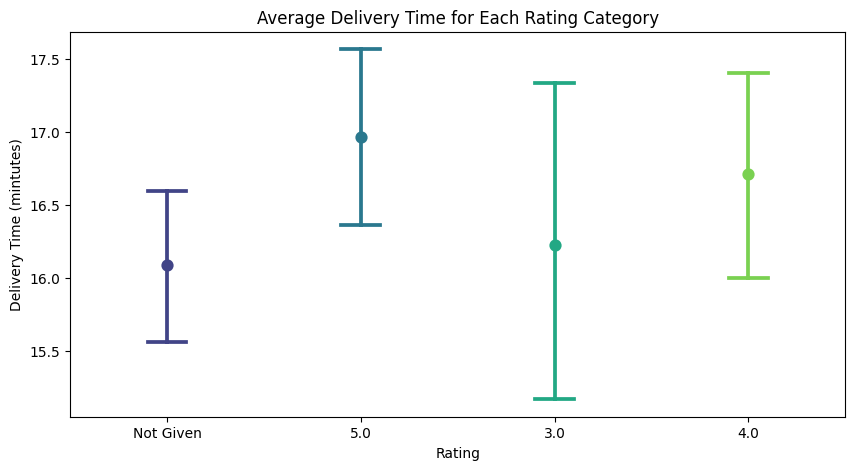

In [ ]:
# relationship between rating and food preparation time
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='rating', y='cost_of_the_order',capsize=0.2, palette='viridis');
plt.title('Average Delivery Time for Each Rating Category')
plt.ylabel('Delivery Time (mintutes)')
plt.xlabel('Rating');

* While very minimal (by about 50 cents), it does appear that on average, orders that cost slightly are rated higher.
* The error bar for the 3.0 rating indicates that cost of orders within that rating category tends to vary more compared to other rating categories. This could be due to various factors such as wider range of order sizes, diverse menu items, or other factors influencing cost.

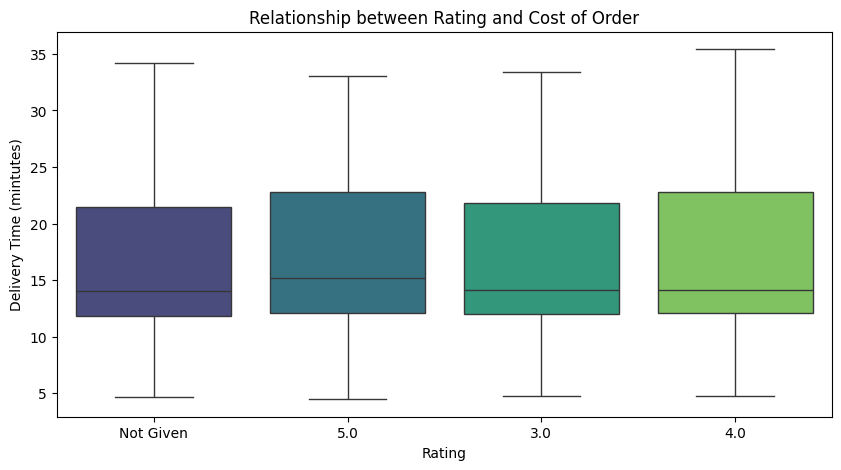

In [ ]:
# relationship between rating and cost of the order
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', palette='viridis');
plt.title('Relationship between Rating and Cost of Order')
plt.ylabel('Delivery Time (mintutes)')
plt.xlabel('Rating');

* The medians of 'Not Given', 3.0, and 4.0 ratings all appear to be the same at around 14 dollars.
* 5.0 has the highest median at around 16 dollars.
* There are no outliers present in the data.
* The lack of extreme variability in the boxplots suggest that the order rating doesn't vary significantly based on the cost of the order.

####Correlation of Variables

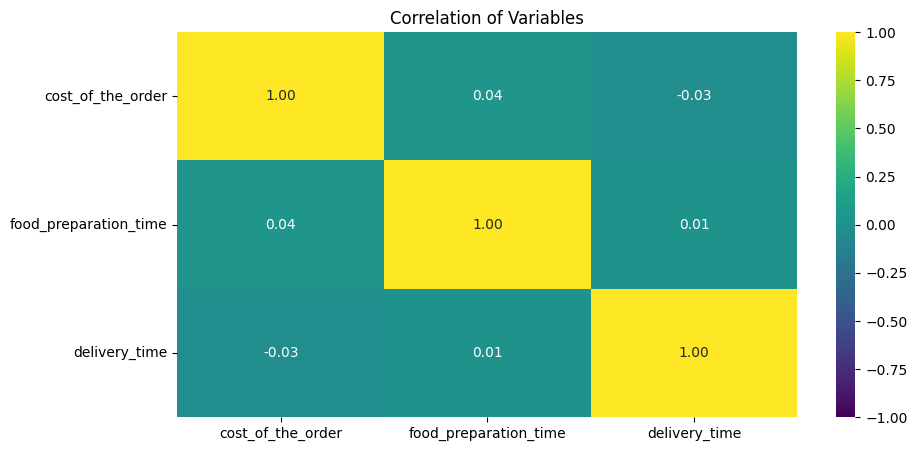

In [ ]:
# correlation of variables creating heatmap
col_list = ['cost_of_the_order', 'food_preparation_time','delivery_time']
plt.figure(figsize=(10,5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='viridis');
plt.title('Correlation of Variables');

* The correlation coefficient of each of these relationships are all very close to 0, which indicates an extremely weak relationship. T
* In regards to the three variables: cost of order, food prep time, and delivery time - we can not predict the outcome of one based on the other.

<Figure size 1000x500 with 0 Axes>

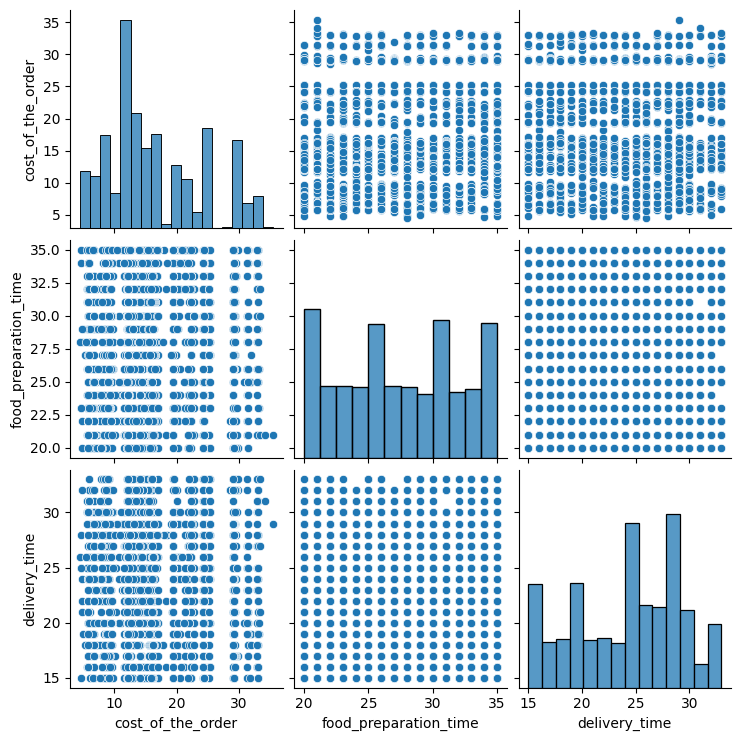

In [ ]:
# double checking the relationship between varaiables on a graph
plt.figure(figsize=(10,5))
sns.pairplot(data=df,vars=['cost_of_the_order','food_preparation_time', 'delivery_time'],palette='viridis');

* The scattered pattern with data points dispersed across the plot shows no clear trend or pattern.
* High variability suggests that a linear trend is not apparent.





### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# filter by rated restaurants
df_rated = df[df['rating'] !='Not Given'].copy()

# convert rating column to integer
df_rated['rating'] = df_rated['rating'].astype('int')


In [ ]:
# grouping restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# getting restaurant names that have rating count more than 50
restaurant_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
print(restaurant_names)


0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


In [ ]:
# filtering the data of restaurants that have rating count over 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(restaurant_names)].copy()

# group restuarant names with rating and find mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:



*   There are 4 restaurants that would qualify for this promotional order - The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.
* Out of the 4, The Meatball Shop has the highest average rating with a 4.5.
* All 4 of these restaurants were included in the 5 most popular restaurants. Because these restaurants are clearly well-liked and more people ordered from them, they were most likely to have an adequate number of ratings/high ratings, and therefore recieve a promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# determining the revenue
def compute_rev(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*.15
  else:
    return 0

df['revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not Given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not Given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74


In [ ]:
# getting the total revenue
total_revenue = df['revenue'].sum()
print('The net revenue is around', round(total_revenue,2),'dollars.')

# getting the average dollar amount taken per order
print('The average revenue per order is', round(total_revenue/1898,2),'dollars.')

The net revenue is around 6166.3 dollars.
The average revenue per order is 3.25 dollars.


#### Observations:

* The net revenue generated from the orders is 6,166.30 dollars.
* From the head of the data alone, we can see that there is a substantial dollar amount difference in the amount taken from orders that are more expensive vs less expensive.
* On average, 3.25 dollars is taken from each order.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# creating a new data frame for total delivery time
df['total_delivery_time']= df['food_preparation_time']+ df['delivery_time']

# calculating the number of orders that took over 60 minutes to prepare and deliver
df_delivery_time_greater_than_60 = df[df['total_delivery_time']>60]
print('There are',df_delivery_time_greater_than_60.shape[0], 'orders that took over 60 minutes to prepare and deliver.')

# calculating the percentage of total orders that took over 60 minutes to prepare and deliver
percentage_over_60 = (df_delivery_time_greater_than_60.shape[0]/df.shape[0])*100
print('Therefore,',round(percentage_over_60,2),'% of orders took over 60 minutes to prepare and deliver.')

There are 200 orders that took over 60 minutes to prepare and deliver.
Therefore, 10.54 % of orders took over 60 minutes to prepare and deliver.


#### Observations:

* About 90% of orders take under an hour to deliver from the time the order is placed. This could be an important statistic that the app could use to encourage customers to order from their app if they are wanting a quick delivery.

* We could potentially look into alternative factors such as time of day, specific day of the week, busy hours of restaurant, or distance from the restaurant, etc to further explore what impacts the total delivery time.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# getting the mean delivery time on weekdays
print('The mean delivery time on the weekdays is around', round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()),'minutes.')

# getting the mean delivery time on weekends
print('The mean delivery time on the weekends is around', round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()),'minutes.')

The mean delivery time on the weekdays is around 28 minutes.
The mean delivery time on the weekends is around 22 minutes.


#### Observations:



*   The average delivery time is higher on the weekdays and lower on weekends.
* This could be attributed to work traffic/work schedule, as many people eat meals around the same time as work traffic is at its peak.



# **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## **Insights:**

We analyzed the data of 1898 food delivery orders placed through an app, coming from a variety of different restaurants in New York. The main goal of the company's analysis is to enhance customer experience and improve the business model, and the main points of interest here are the ratings and the demand from different restaurants. In order to reach these conclusions, we needed to get a better idea of what factors into how a customer rates an order - or whether they rate the order at all. We also needed to determine which restaurants/cuisine types are most popular amongst the population.


### **Conclusions:**

1. There are a lot of orders that are not rated in the data set, which is the most important piece of information to have when trying to gauge customer satisfaction/experience. There does not seem to be a specific reason for whether an order was rated or not.
2. Of the orders that are rated, 84% are rated a 4.0 or higher, which indicates high customer satisfaction. High ratings contribute to customer loyalty, and satisfied customers are more likely to return and recommend the business to others.
3. American, Japanese, and Italian cuisine are the three most popular cuisine types. They also have the most restaurant choices of these three cuisine types on the app.
4. Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the top three most popular restaurants on both weekends and weekdays.  
4. More people order on the weekend than during the week.
5. Delivery time is longer on the weekdays.
6. Delivery time, food preparation time, and cost of the order do not appear to have an impact on the rating of the order.
7. We need to further investigate what factors into order ratings and overall customer experience.


## **Recommendations:**

####Improve Rating Collection:

*   The business should implement better strategies to encourage more customers to provide ratings.
*   Offering incentives, sending reminders/notifications immediately after the order is delivered, or having a reminder to rate the order when they open the app again could increase feedback.
* Consider adding brief surveys for why an order was rated as they are rated. For example, if it was rated a 3.0, the prompts could give a few prompts of Why - 'Bad Quality', 'Slow Delivery', 'Order was Wrong', 'Other: fill in blank'. This could help the company narrow down what customers care most about when rating an order, and how to go about resolving specific issues.

#### Maintain High Customer Satisfaction

*   Continue to focus on maintaining high-quality service to ensure that the majority of orders receive ratings 4.0 or higher.
* Have a customer support line/chat as well as FAQ section on the app so customers can voice their concerns
*   Suggestion: If an order was incorrect or showed up to the customer damaged, consider offering refunds or in-app credits for the particular item.
* High customer satisfaction will contribute to customer loyalty and positive word of mouth.


#### Diversify Cuisine Options


*   Even though American, Japanese, and Italian cuisine are very popular in New York, they could partner with more restaurants of different cuisine types.
*   Diversifying offerings could expand the app's target market, leading to a wider consumer base.


#### Collaborate with Restaurants


*   Leverage the popularity of restaurants such as Shake Shack, The Meatball Shop, and Blue Ribbon Sushi by featuring them at the top of the app and using them in marketing content.
*   Consider partnerships with these restaurants with deals like adding a free item if you spend a certain amount, free delivery if you spend a certain amount, etc.
* Collaborate with restaurants to help better understand customer preferences and create joint marketing efforts. This will strengthen the relationship with restaurants and encourage them to continue working with the company.

#### Optimize Operations

*   Since more orders are placed on the weekends, optimization is key to make sure that increased demand is handled efficiently.
* Location-based analysis could be useful to see where the most popular restaurants are located and where customers are located to incentivize drivers to populate around the popular hubs.
* It could also be useful to compare restaurant locations if there are descrepancies in ratings from different locations of the same restaurant.
* Time-based analysis could be useful as well to see what areas/restaurants/cuisines are ordered from and when.
*   Conduct further research on why delivery times are longer on weekdays compared to weekends. Although it is likely due to traffic concerns, the location/time-based analyses could potentially shorten delivery times in these popular areas.

#### Enhance Customer Experience

*  Consider aspects beyond delivery time, food prep time, and cost and focus on enhancing the overall customer experience by doing things such as continuously improving app interface, providing customer support, ensuring drivers are qualified and reliable, and more.
*   Regularly monitor customer feedback, order patterns, and market trends so the company can continuously improve the business model based on changing customer preferences.

















In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving PYF_Project_LearnerNotebook_FullCode (2).ipynb to PYF_Project_LearnerNotebook_FullCode (2).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---